### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Петров Артем Евгеньевич
##### Группа:   НКНбд-01-21

## Москва 2024
***

1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции. 
2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду. 
3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок. 
4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции. 
5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок. 
6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок. 
7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал [0, 1]. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость обучения. 
8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.  
9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду. 

![Вариант задания](GetImage.png)

## 1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

f(x) = (3*x - x^3) * sin(x), x in [0, 2] 

In [178]:
import tensorflow as tf
import math
import numpy as np

In [179]:
X = np.arange(0, 2, 0.01)

In [180]:
tensor_xy = tf.constant([X, [(3*x - x ** 3) * np.sin(x) for x in X]], dtype = tf.float32)
print(tf.rank(tensor_xy))

tf.Tensor(2, shape=(), dtype=int32)


In [181]:
print("MAX: ", tensor_xy[0][tf.argmax(tensor[1])], tf.reduce_max(tensor[1]))
print("MIN: ", tensor_xy[0][tf.argmin(tensor[1])], tf.reduce_min(tensor[1]))

MAX:  tf.Tensor(0.99, shape=(), dtype=float32) tf.Tensor(4.9600000000000035, shape=(), dtype=float64)
MIN:  tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float64)


## 2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

In [182]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex' : False
})

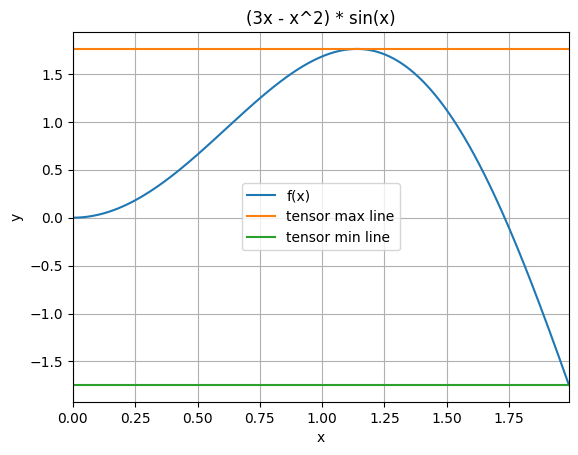

In [185]:
plt.plot(tensor_xy[0], tensor_xy[1], label = 'f(x)')
plt.grid(True)
plt.plot([0, 2], [tf.reduce_max(tensor_xy[1]), tf.reduce_max(tensor_xy[1])], label = 'tensor max line')
plt.plot([0, tensor_xy[0][tf.argmin(tensor_xy[1])]], [tf.reduce_min(tensor_xy[1]), tf.reduce_min(tensor_xy[1])], label = 'tensor min line')
plt.xlim([0, max(X)])
plt.title('(3x - x^2) * sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## 3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

Порядок ф-ции одной производной -- 4

In [186]:
X_tensor = tf.Variable(tensor_xy[0])
# Y_tensor = tf.Variable(tensor)

with tf.GradientTape() as der1:
    with tf.GradientTape() as der2:
        with tf.GradientTape() as der3:
            with tf.GradientTape() as der4:
                Y_tensor = (3*X_tensor - X_tensor**2) * np.sin(X_tensor)
                d4ydx4 = der4.gradient(Y_tensor, X_tensor)
                print("Y=", d4ydx4[0:5], "\n", "X=", X_tensor[0:5])

Y= tf.Tensor([0.         0.0297995  0.05919605 0.08818676 0.11676885], shape=(5,), dtype=float32) 
 X= tf.Tensor([0.   0.01 0.02 0.03 0.04], shape=(5,), dtype=float32)


(0.0, 2.0)

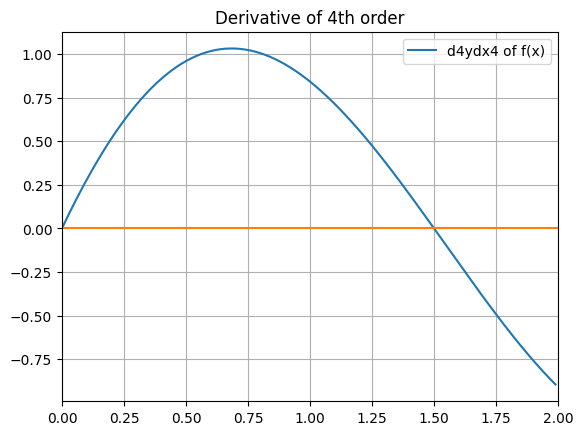

In [187]:
plt.plot(X_tensor, d4ydx4, label = "d4ydx4 of f(x)")
plt.grid(True)
plt.title('Derivative of 4th order')
plt.legend()
plt.plot([0, 3], [0, 0])
plt.xlim(0, 2)

(0.0, 2.0)

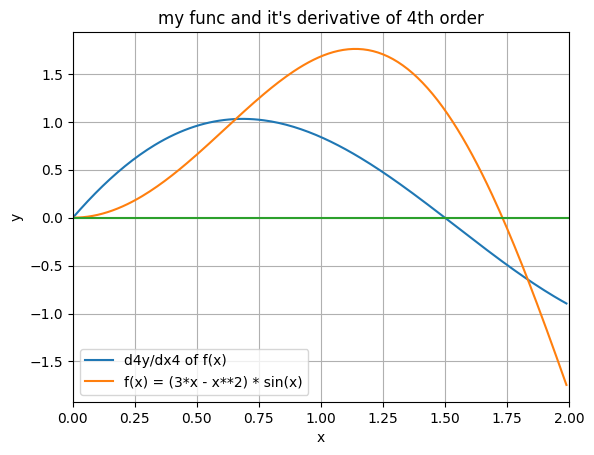

In [188]:
plt.plot(X_tensor, d4ydx4, label = "d4y/dx4 of f(x)")

plt.plot(tensor_xy[0], tensor_xy[1], label = 'f(x) = (3*x - x**2) * sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('my func and it\'s derivative of 4th order')
plt.legend()
plt.plot([0, 3], [0, 0])
plt.xlim(0, 2)

In [189]:
del der1
del der2
del der3
del der4

# 4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

f(x, y) = x*ln(x+y), x in [1, 5] and y in [1, 5] 

In [190]:
X = [x for x in np.arange(1, 5, 0.04)]
Y = [y for y in np.arange(1, 5, 0.04)]
print(len(X), len(Y))

100 100


In [191]:
import itertools

In [192]:
tensor = tf.constant([X, Y, [x * np.log(x+y) for x, y in zip(X, Y)]], dtype = tf.float64)
print(tensor)

tf.Tensor(
[[ 1.          1.04        1.08        1.12        1.16        1.2
   1.24        1.28        1.32        1.36        1.4         1.44
   1.48        1.52        1.56        1.6         1.64        1.68
   1.72        1.76        1.8         1.84        1.88        1.92
   1.96        2.          2.04        2.08        2.12        2.16
   2.2         2.24        2.28        2.32        2.36        2.4
   2.44        2.48        2.52        2.56        2.6         2.64
   2.68        2.72        2.76        2.8         2.84        2.88
   2.92        2.96        3.          3.04        3.08        3.12
   3.16        3.2         3.24        3.28        3.32        3.36
   3.4         3.44        3.48        3.52        3.56        3.6
   3.64        3.68        3.72        3.76        3.8         3.84
   3.88        3.92        3.96        4.          4.04        4.08
   4.12        4.16        4.2         4.24        4.28        4.32
   4.36        4.4         4.44        4

In [193]:
print("rank = ", tf.rank(tensor))

rank =  tf.Tensor(2, shape=(), dtype=int32)


In [194]:
print("max(f(x, y)) =", tf.reduce_max(tensor[2]).numpy(), "\n", \
      "x =", tensor[0][tf.argmax(tensor[2])].numpy(),"\n", \
      "y =", tensor[1][tf.argmax(tensor[2])].numpy())

max(f(x, y)) = 11.380982489632048 
 x = 4.9600000000000035 
 y = 4.9600000000000035


# 5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

In [195]:
from matplotlib import cm

In [196]:
x = tensor[0]
y = tensor[1]
z = tensor[2]

Text(0.5, 0, 'z')

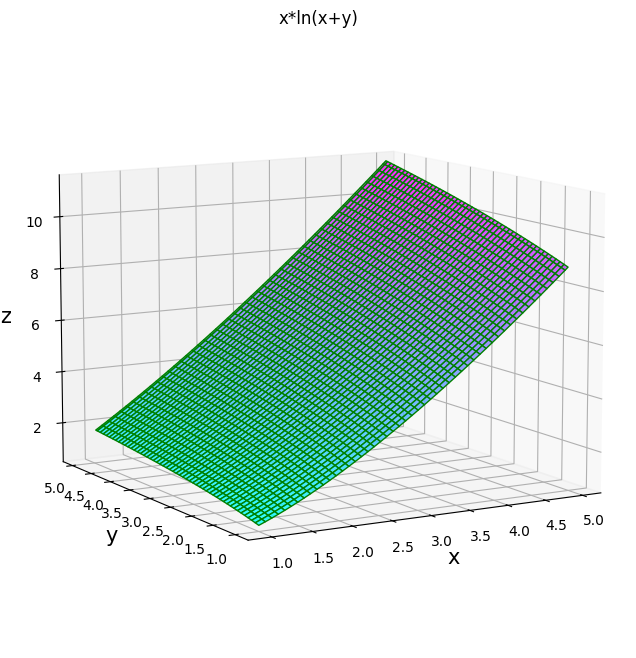

In [197]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def f(x, y):
    return x * np.log(x+y)

X_mesh, Y_mesh = np.meshgrid(x, y)
ax.plot_surface(X_mesh, Y_mesh, f(X_mesh, Y_mesh), color = 'green', cmap = 'cool', alpha = 0.8)

ax.view_init(azim = -120, elev = 10)
ax.set_title("x*ln(x+y)")
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)

# 6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

d3/dx2dy

In [198]:
# x = tf.Variable(tensor[0])
# y = tf.Variable(tensor[1])
# z = tf.Variable(tensor[2])
# x, y, z

x = tf.Variable(tensor[0])
y = tf.Variable(tensor[1])
# z = tf.Variable(tensor[2])
x, y

(<tf.Variable 'Variable:0' shape=(100,) dtype=float64, numpy=
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16,
        3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 ,
        3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  , 4.04,
        4.08, 4.12, 4.16, 4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 , 4.44, 4.48,
        4.52, 4.56, 4.6 , 4.64, 4.68, 4.72, 4.76, 4.8 , 4.84, 4.88, 4.92,
        4.96])>,
 <tf.Variable 'Variable:0' shape=(100,) dtype=float64, numpy=
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2

In [199]:
def f(x, y):
    return x * tf.math.log(x + y)

with tf.GradientTape(persistent = True) as tape:
    # tape.watch(x)
    # tape.watch(y)

    z = f(x, y)
    # tape.watch(z)
    
    dx =tape.gradient(z, x)
    print(dx)
    dxx = tape.gradient(dx, x)
    print(dxx)
    dxxdy = tape.gradient(dxx, y)
    print(dxxdy)


# del tape

tf.Tensor(
[1.19314718 1.23236789 1.27010822 1.30647587 1.34156719 1.37546874
 1.40825856 1.44000726 1.47077892 1.50063188 1.52961942 1.55779029
 1.58518927 1.61185752 1.637833   1.66315081 1.68784342 1.71194097
 1.73547147 1.75846099 1.78093385 1.80291275 1.82441896 1.84547237
 1.86609165 1.88629436 1.90609699 1.92551507 1.94456327 1.9632554
 1.98160454 1.99962305 2.01732262 2.03471437 2.0518088  2.06861592
 2.08514522 2.10140574 2.11740608 2.13315444 2.14865863 2.1639261
 2.17896398 2.19377906 2.20837786 2.2227666  2.23695123 2.25093747
 2.2647308  2.27833645 2.29175947 2.3050047  2.31807678 2.33098018
 2.34371921 2.35629799 2.36872051 2.3809906  2.39311196 2.40508815
 2.41692261 2.42861865 2.44017947 2.45160817 2.46290773 2.47408103
 2.48513086 2.49605993 2.50687085 2.51756614 2.52814825 2.53861955
 2.54898233 2.55923883 2.56939121 2.57944154 2.58939187 2.59924417
 2.60900034 2.61866225 2.62823171 2.63771045 2.64710019 2.65640258
 2.66561924 2.67475172 2.68380156 2.69277023 2.701659

In [200]:
X_mesh, Y_mesh = np.meshgrid(x, y)
# Z_mesh = np.zeros((100, 1)) + dxxdy.numpy()
Z_mesh = np.tile(dxxdy, (dxxdy.shape[0], 1))
print(X_mesh.shape, Y_mesh.shape, dxxdy.shape[0])
# Z_mesh = np.meshgrid(z, z)
X_mesh, Y_mesh, Z_mesh

(100, 100) (100, 100) 100


(array([[1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96],
        [1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96],
        [1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96],
        ...,
        [1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96],
        [1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96],
        [1.  , 1.04, 1.08, ..., 4.88, 4.92, 4.96]]),
 array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
        [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
        [1.08, 1.08, 1.08, ..., 1.08, 1.08, 1.08],
        ...,
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.92, 4.92, 4.92, ..., 4.92, 4.92, 4.92],
        [4.96, 4.96, 4.96, ..., 4.96, 4.96, 4.96]]),
 array([[-0.25      , -0.23113905, -0.21433471, ..., -0.01049785,
         -0.01032785, -0.01016194],
        [-0.25      , -0.23113905, -0.21433471, ..., -0.01049785,
         -0.01032785, -0.01016194],
        [-0.25      , -0.23113905, -0.21433471, ..., -0.01049785,
         -0.01032785, -0.01016194],
        ...,
        [-0.25      , -0.23113905, -0.2

Text(0.5, 0, 'z')

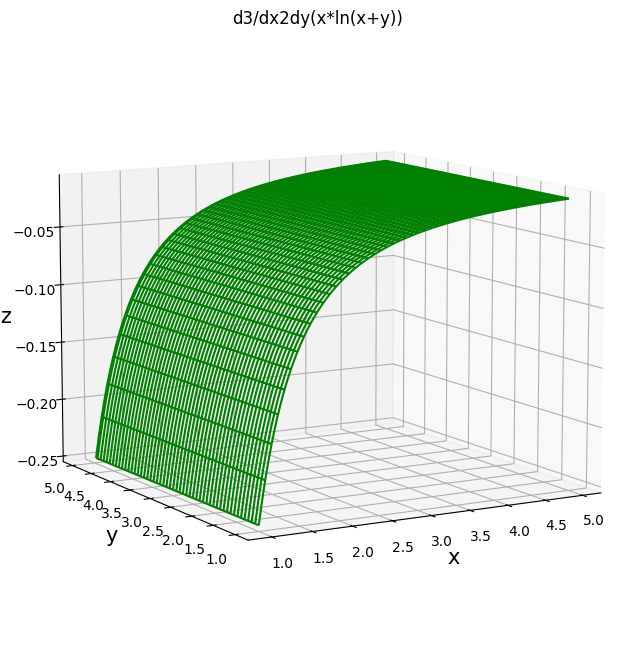

In [201]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# def f(x, y):
#     return x * tf.math.log(x+y)
ax.plot_wireframe(X_mesh, Y_mesh, Z_mesh, color = 'green')

ax.view_init(azim = -120, elev = 10)
ax.set_title("d3/dx2dy(x*ln(x+y))")
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)

## 7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал [0, 1]. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость обучения.

Показатель качества регрессии -- MaxErr

In [330]:
X, Y = tensor_xy[0], tensor_xy[1]
xn = (X - tf.reduce_min(X))/(tf.reduce_max(X) - tf.reduce_min(X))
yn = (Y - tf.reduce_min(Y))/(tf.reduce_max(Y) - tf.reduce_min(Y))

xn[:5], yn[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ],
       dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.49769297, 0.4977785 , 0.4980351 , 0.49846262, 0.49906075],
       dtype=float32)>)

Text(0.5, 1.0, 'scatter plot for our func (3*x - x**2) * sin(x) where x in 0 to 2')

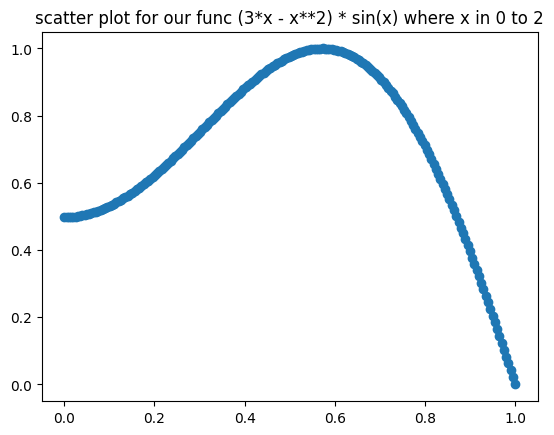

In [331]:
plt.scatter(xn, yn)
plt.title('scatter plot for our func (3*x - x**2) * sin(x) where x in 0 to 2')

In [332]:
reg = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1,kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.01, l2=0.01))
])

In [333]:
def MaxErr(y_pred, y_real):
    accuracy = tf.reduce_max(y_real - y_pred)
    return accuracy

In [334]:
reg.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics = [MaxErr]
)

In [335]:
uhist = reg.fit(
    xn, yn,
    epochs = 50,
    verbose = 1,
    validation_split = 0.3
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.6030 - max_err: -0.1452 - val_loss: 0.2862 - val_max_err: 0.2893
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5367 - max_err: -0.0633 - val_loss: 0.2912 - val_max_err: 0.3853
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4661 - max_err: 0.0257 - val_loss: 0.3116 - val_max_err: 0.4815
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4019 - max_err: 0.1101 - val_loss: 0.3481 - val_max_err: 0.5778
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3367 - max_err: 0.1926 - val_loss: 0.4015 - val_max_err: 0.6744
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2684 - max_err: 0.2737 - val_loss: 0.4724 - val_max_err: 0.7702
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2070 - max_err: 0.3451 - val_loss: 0.5608 - val_max_err: 0.8653
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1389 - max_err: 0.4379 - val_loss: 0.6524 - val_max_err: 0.9594
Epoch 9/50
5/5

## 8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.

In [336]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    # plt.ylim([0, max(history.history['loss'])])
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error for sequential model')
    plt.legend()
    plt.grid(True)


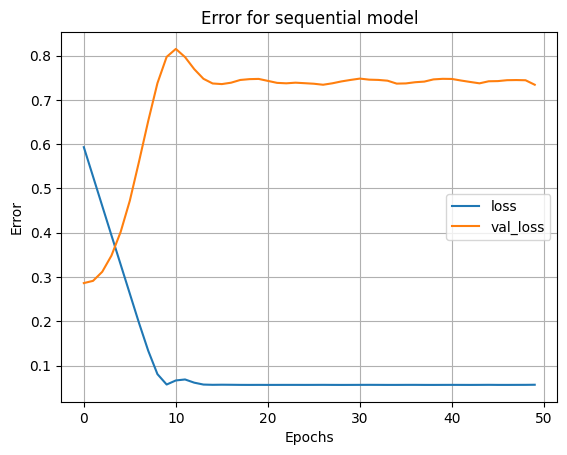

In [337]:
plot_loss(uhist)

In [338]:
def plot_metrics(history):
    plt.plot(history.history['max_err'], label = 'max_err')
    plt.plot(history.history['val_max_err'], label = 'val_max_err')
    # plt.ylim([0, max(history.history['r2_score'])*1])
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('MaxErr score for sequential model')
    plt.legend()
    plt.grid(True)

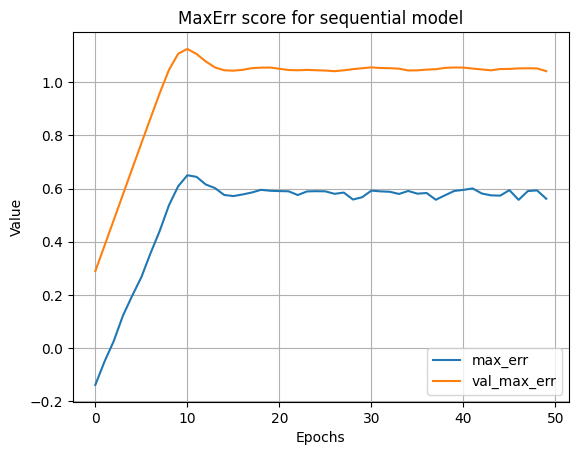

In [339]:
plot_metrics(uhist)

## 9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

In [340]:
y_pred = reg.predict(xn)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


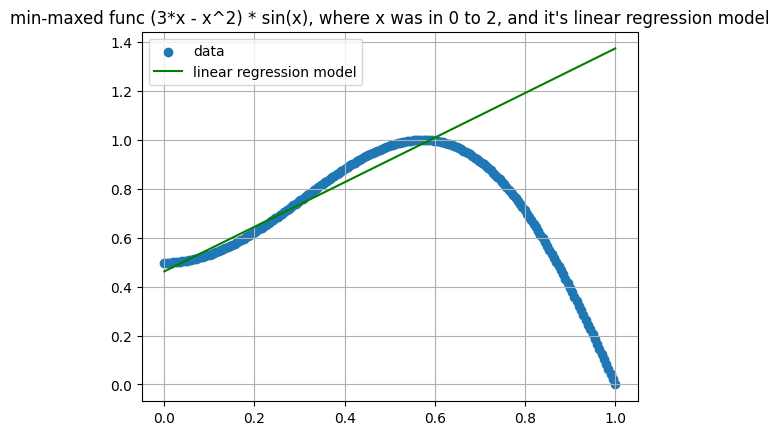

In [341]:
plt.scatter(xn, yn, label = 'data')
plt.plot(xn, y_pred, label = 'linear regression model', c = 'green')
plt.title('min-maxed func (3*x - x^2) * sin(x), where x was in 0 to 2, and it\'s linear regression model')
plt.legend()
plt.grid(True)

# Как мы видим, к сожалению, у нас не получится идеально решить задачу моделью линейной регрессии, так как изначальная функция похожа на синусойду, из-за чего периодически она будет убывать и снова возрастать.  